
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ChanifRusydi/simple_chatbot/blob/main/chatbot_with_tensorflow.ipynb

In [2]:
!pip install nltk


In [3]:
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle
import numpy as np
import tensorflow as tf
import pandas as pd

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chanifrusydi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chanifrusydi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/chanifrusydi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
ignore_symbols=['?','!']
intents_json=json.loads(open('intents.json').read())
words=[]
classes=[]
documents=[]
lemmetizer=WordNetLemmatizer()
for intent in intents_json['intents']:
    for j in intent['tag']:
        word=nltk.word_tokenize(j)
        words.extend(word)
        documents.append((word,intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words=[lemmetizer.lemmatize(w.lower()) for w in words if w not in ignore_symbols]
words=sorted(list(set(words)))
classes=sorted(list(set(classes)))

In [8]:
training=[]
output=[]
for document in documents:
    bag=[]
    pattern_words=document[0]
    pattern_words=[lemmetizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row=[0]*len(classes)
    output_row[classes.index(document[1])]=1
    training.append([bag,output_row])

In [10]:
import random
random.shuffle(training)
training=np.array(training,dtype=object)

In [11]:
train_x=list(training[:,0])
train_y=list(training[:,1])

In [12]:
train_x

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0,

In [13]:
train_y

[[0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0,

In [14]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(None,)))
model.add(tf.keras.layers.Embedding(len(words),8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(tf.keras.layers.Dense(len(train_y[0]),activation='softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-05-10 11:52:18.818120: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 11:52:18.818496: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]


(None, None) <dtype: 'float32'>
(None, 7) <dtype: 'float32'>


[None]

In [17]:
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

embedding (None, None) float32
bidirectional (None, None, 8) float32
bidirectional_1 (None, None, 128) float32
dense (None, 128) float32
dense_1 (None, 128) float32


[None, None, None, None, None]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           168       
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        37376     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 153,775
Trainable params: 153,775
Non-trai

In [21]:
history=model.fit(train_x,train_y,epochs=200)

Epoch 1/200


2022-05-10 11:53:36.900151: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-10 11:53:39.167023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 11:53:39.706668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 11:53:39.717075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 11:53:40.000679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 11:53:40.011136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 11:53:40.461162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

3/3 [==============================] - 5s 215ms/step - loss: 1.9436 - accuracy: 0.1951
Epoch 2/200
3/3 [==============================] - 0s 50ms/step - loss: 1.9391 - accuracy: 0.2439
Epoch 3/200
3/3 [==============================] - 0s 44ms/step - loss: 1.9353 - accuracy: 0.1585
Epoch 4/200
3/3 [==============================] - 0s 39ms/step - loss: 1.9306 - accuracy: 0.2439
Epoch 5/200
3/3 [==============================] - 0s 40ms/step - loss: 1.9266 - accuracy: 0.2439
Epoch 6/200
3/3 [==============================] - 0s 41ms/step - loss: 1.9228 - accuracy: 0.2439
Epoch 7/200
3/3 [==============================] - 0s 41ms/step - loss: 1.9192 - accuracy: 0.2439
Epoch 8/200
3/3 [==============================] - 0s 39ms/step - loss: 1.9149 - accuracy: 0.2439
Epoch 9/200
3/3 [==============================] - 0s 40ms/step - loss: 1.9114 - accuracy: 0.2439
Epoch 10/200
3/3 [==============================] - 0s 40ms/step - loss: 1.9081 - accuracy: 0.2439
Epoch 11/200
3/3 [============

Text(0.5, 0, 'epoch')

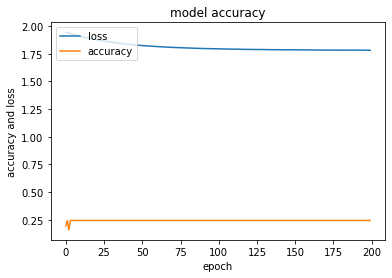

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.legend(['loss','accuracy'],loc='upper left')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [ ]:
model.save('chatbot_model.h5')